In [3]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


In [6]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [10]:
cifar10.data_path = "data/CIFAR-10/"

In [11]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [13]:
## Analysing the data
## It represents the RGB values of the pixel(12,22) of 5th image in training dataset 
images_train[5][12][22]

array([0.78823529, 0.28235294, 0.27058824])

In [14]:
#flattening the image data
images_train.shape

(50000, 32, 32, 3)

In [15]:
images_test.shape

(10000, 32, 32, 3)

In [16]:
x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0], -1)

In [17]:
x_train.shape

(50000, 3072)

In [18]:
x_test.shape

(10000, 3072)

In [19]:
y_train = cls_train
y_test = cls_test

In [20]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

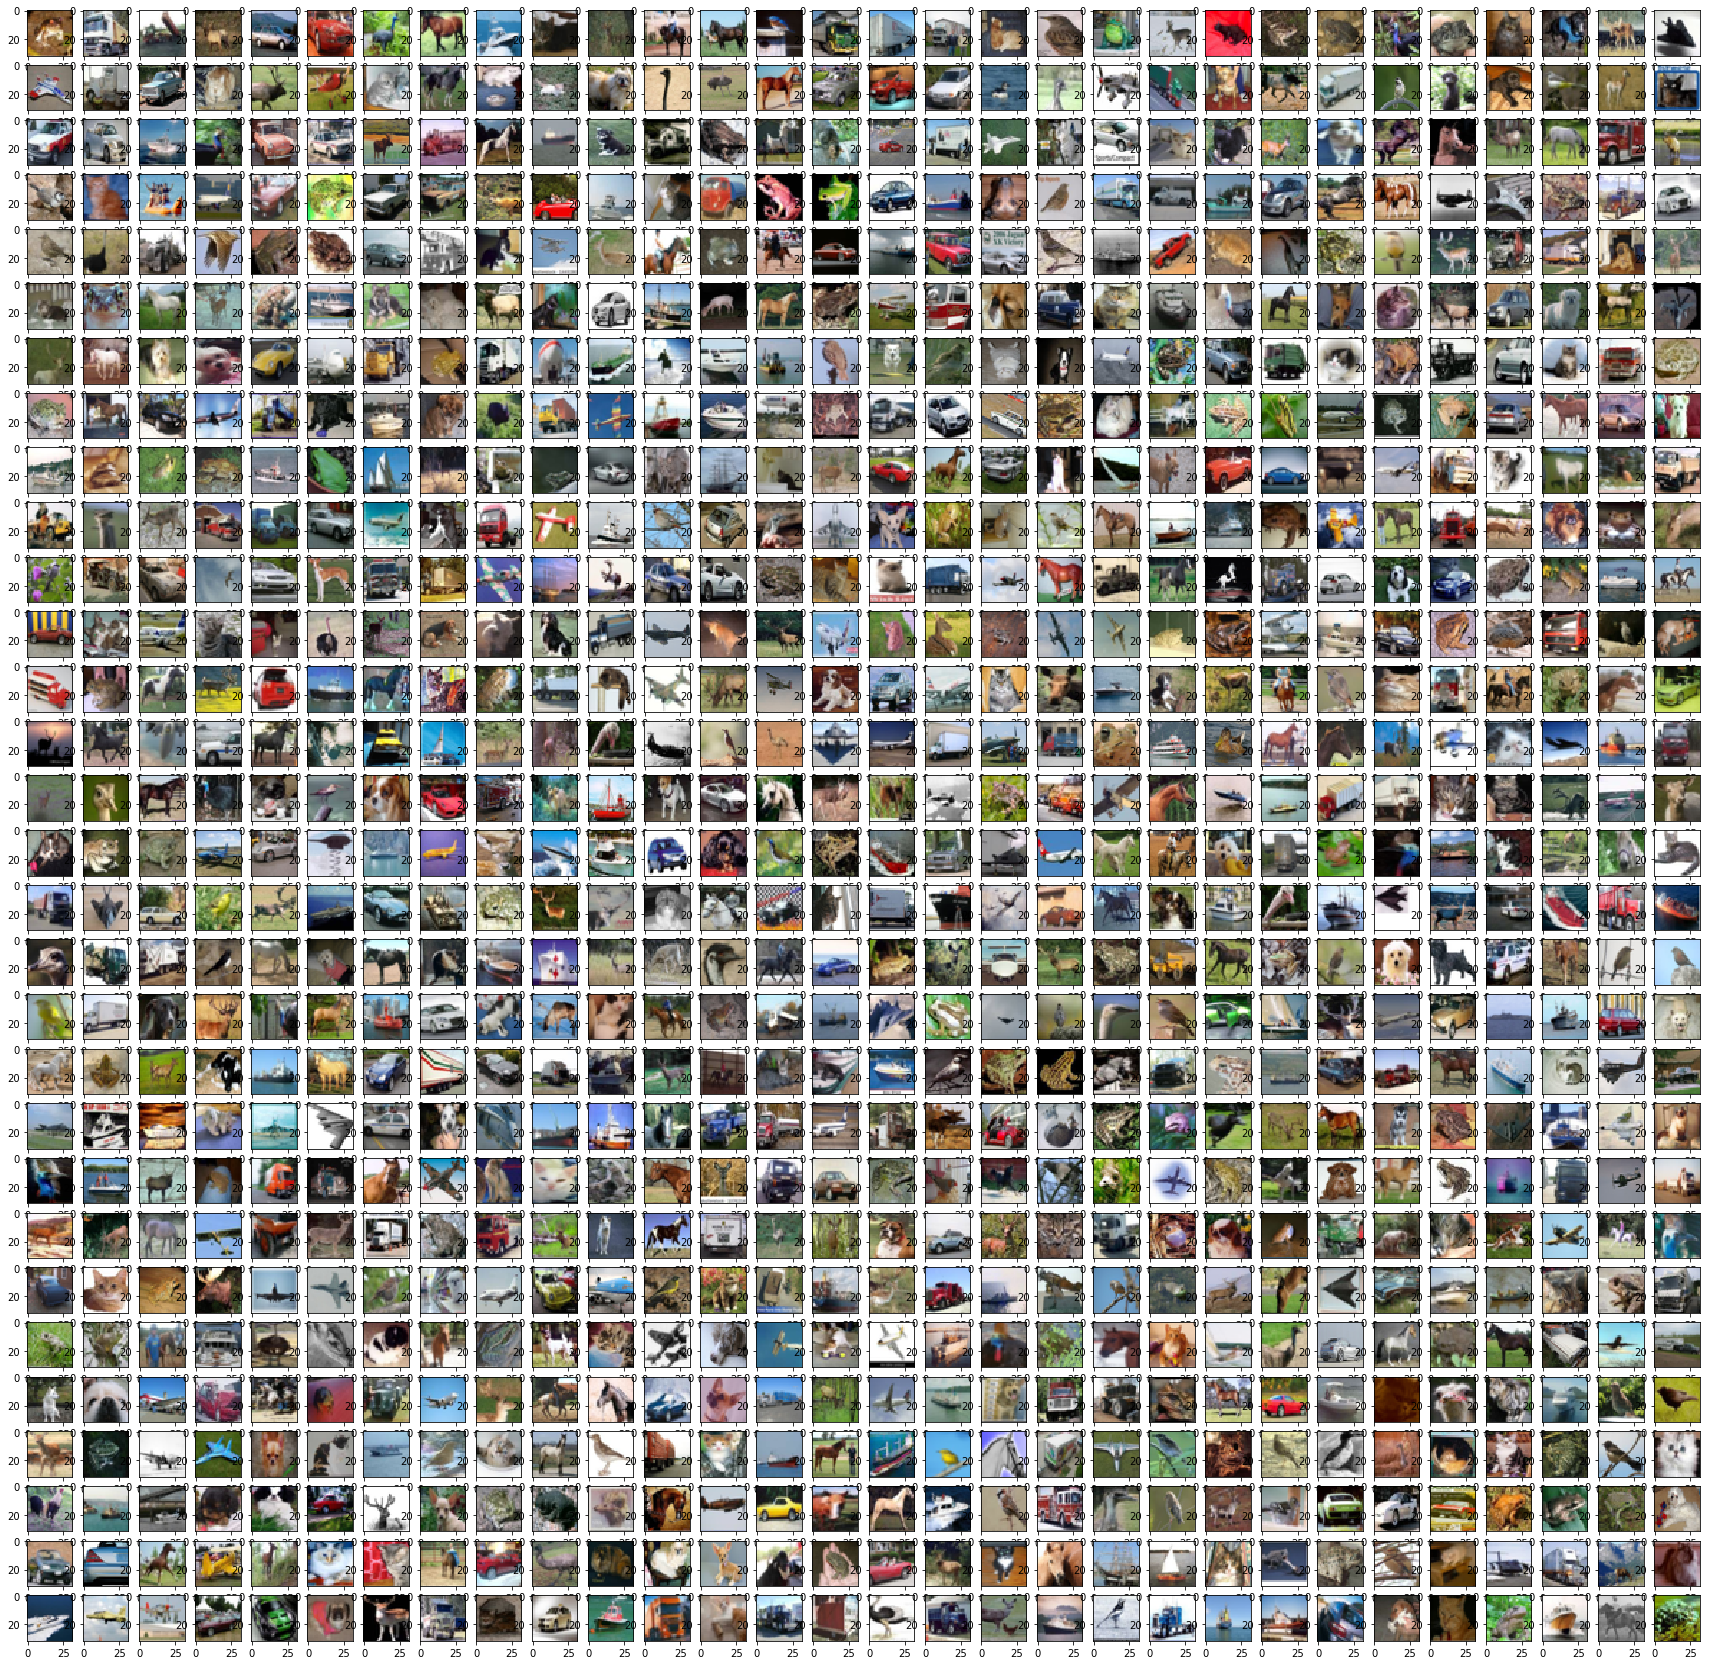

In [49]:
# plotting first 64 images
fig = plt.figure(figsize=(30,30))

for i in range(900):
    ax = fig.add_subplot(30, 30, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()


In [50]:
#applying pca
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [51]:
pca.explained_variance_.shape

(3072,)

In [52]:
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

In [53]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [54]:
## Training 
lr =LogisticRegression()
lr.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4014

In [41]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
## Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.4835

In [43]:
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

Logistic Regression :  0.4009
Support Vector Classifier :  0.4835


In [44]:
labels = []
for i in range(len(y_pred_svm)):
    labels.append(class_names[y_pred_svm[i]])

In [46]:
np.savetxt("predictions.csv", labels, fmt = '%s')